## Data Preprocessing
Here we are going to classify the dtaa into various subframes and also handle missing values and perform operations to clean the data as we will present several visualisation to improve that data has become better.

In [112]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from IPython.display import Image
from os import path
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [113]:
data = pd.read_csv('/Users/kshitijmahajan/Desktop/FM/archive/responses.csv')
columns = pd.read_csv('/Users/kshitijmahajan/Desktop/FM/archive/columns.csv')

In [114]:
data = data.replace("NaN", np.nan)
data = data.replace("nan", np.nan)

As the data can be categroised into:<br/>
1.Music Features<br/>
2.Movies Features<br/>
3.Hobbies and interests<br/>
4.Phobias <br/>
5.Health habits<br/>
6.Persoanlity traits(includes outlook towards life)<br/>
7.Spending habits <br/>
8.Demographics<br/>
<br/>
<br/>
<b> Hence we will form dataframe of each and process it one by one.To clean and enhance the dataset

In [115]:
music = data.iloc[:,0:19] 
movies = data.iloc[:,19:31] 
phobias = data.iloc[:,63:73] 
hobbies = data.iloc[:,31:63] 
health = data.iloc[:,73:76] 
personal = data.iloc[:, 76:133] 
spending = data.iloc[:,133:140]
demo = data.iloc[:,140:150] 

In [116]:
health['Smoking'].unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [117]:
#Ref:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
health['Smoking'] = health['Smoking'].map({'never smoked': 1, 'tried smoking': 2,'former smoker':3,'current smoker':4})

In [118]:
health['Alcohol'].unique()

array(['drink a lot', 'social drinker', 'never', nan], dtype=object)

In [119]:
health['Alcohol'] = health['Alcohol'].map({'drink a lot': 1, 'social drinker': 2,'never':3})

In [120]:
personal['Punctuality'].unique()

array(['i am always on time', 'i am often early',
       'i am often running late', nan], dtype=object)

In [121]:
personal['Punctuality'] = personal['Punctuality'].map({'i am always on time': 1, 'i am often early': 2,'i am often running late':3})

In [122]:
personal['Lying'].unique()

array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me', nan], dtype=object)

In [123]:
personal['Lying'] = personal['Lying'].map({'never': 1, 'sometimes': 2,'only to avoid hurting someone':3,'everytime it suits me':4})

In [124]:
personal['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [125]:
personal['Internet usage'] = personal['Internet usage'].map({'few hours a day': 1, 'most of the day': 2,'less than an hour a day':3,'no time at all':4})

In [126]:
demo['House - block of flats'].unique()

array(['block of flats', 'house/bungalow', nan], dtype=object)

In [127]:
demo['House - block of flats'] = demo['House - block of flats'].map({'block of flats': 1, 'house/bungalow': 2})

In [128]:
demo['Village - town'].unique()

array(['village', 'city', nan], dtype=object)

In [129]:
demo['Village - town'] = demo['Village - town'].map({'village': 1, 'city': 2})

In [130]:
demo['Gender'] = demo['Gender'].map({'male': 1, 'female': 2})

In [131]:
demo['Education'].unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil', nan], dtype=object)

In [132]:
demo['Education'] = demo['Education'].map({'currently a primary school pupil':1,'primary school' :2,
                                           'secondary school':3,'college/bachelor degree':4,
                                           'masters degree':5,'doctorate degree':6})

In [133]:
demo['Only child'] = demo['Only child'].map({'yes':1,'no':0})

In [134]:
demo['Left - right handed'] = demo['Left - right handed'].map({'left handed':1,'right handed':2})

In [135]:
dfs = [demo,hobbies,phobias,health,personal,spending,music,movies]
new_data = pd.concat( dfs,axis=1)

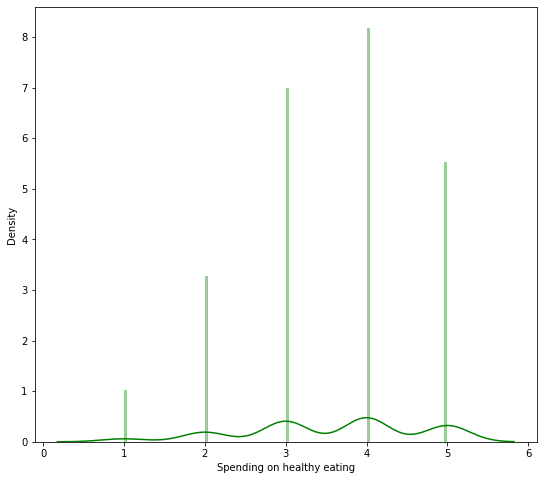

In [136]:
plt.figure(figsize=(9, 8))
sns.distplot(new_data['Spending on healthy eating'], color='g', bins=100, hist_kws={'alpha': 0.4});

####    Analysing for various datasets to check similarity and degree to which the target variable depends on them.That means,how much of target varibale value be showing variation for different kind of features.</b>

Analysing how much of Alcoholic and Smokers will spend on healthy eating what is the variation among them with respect to the target variable

<AxesSubplot:xlabel='Alcohol', ylabel='Spending on healthy eating'>

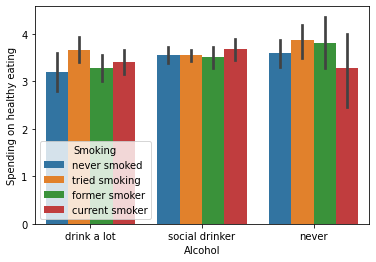

In [137]:
sns.barplot(x="Alcohol", y="Spending on healthy eating", hue="Smoking", data=data )

<b> Explaination</b>
<br/>
As we can see here that people who have never had alchohol and have been former smokers spend more on healthy eating.These insights will help us during classification and prediction later on.

Here I have taken another feature to get insight on How the education and the place where they stay either village or town is likely to depend on they spending on Healthy eating

<AxesSubplot:xlabel='Education', ylabel='Spending on healthy eating'>

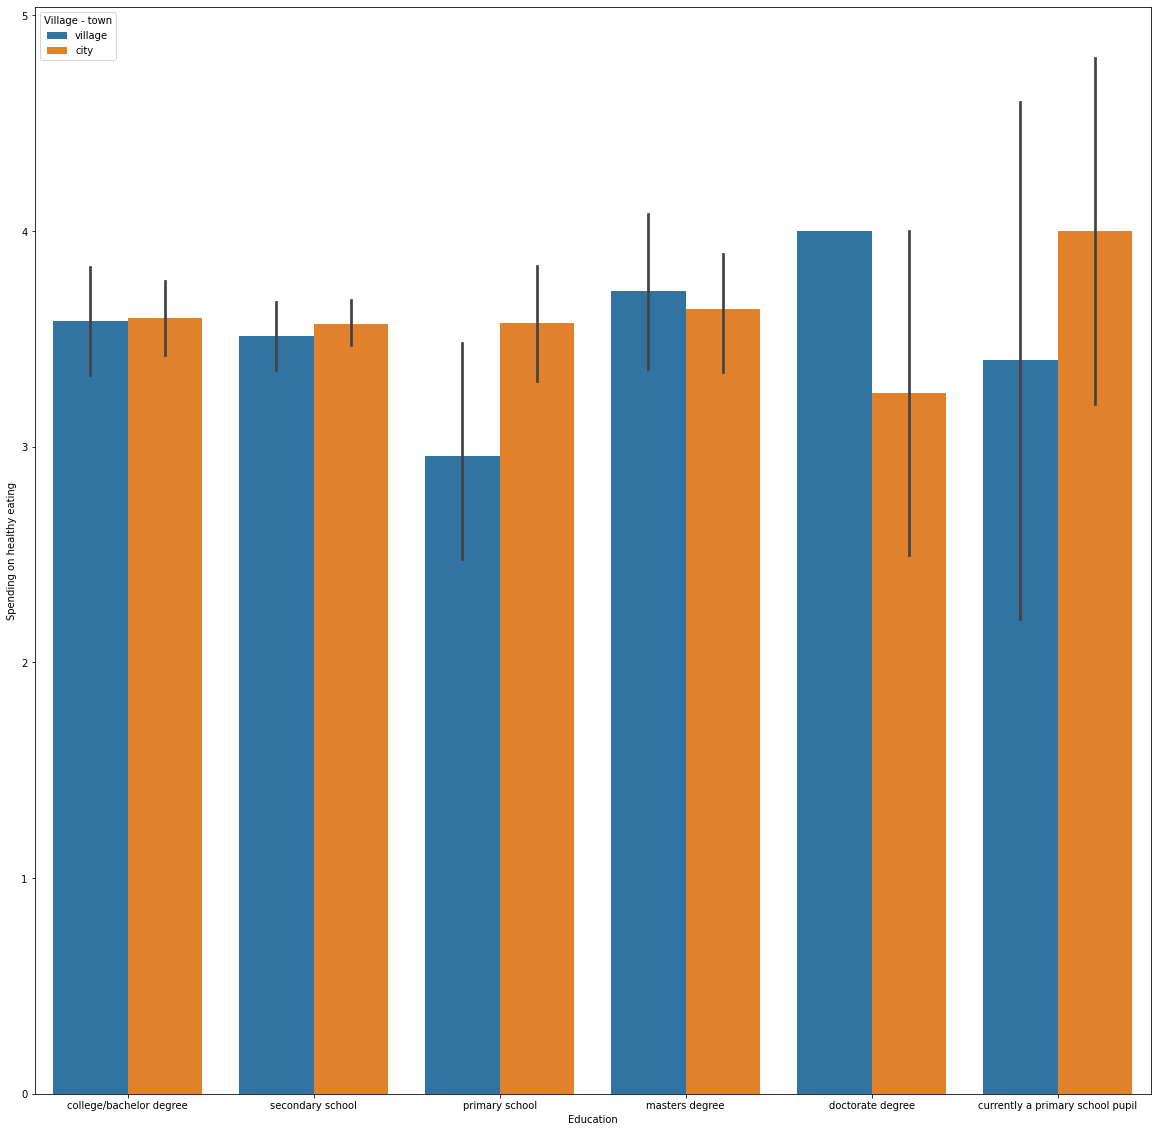

In [138]:
plt.subplots(figsize=(20,20))
sns.barplot(x="Education", y="Spending on healthy eating", hue="Village - town", data=data )

<b> Explaination</b>
<br/>
As we can see here that people are doing doctrate degree in a village and primary school pupil in city are most likely to spend on healthy food than others.

<AxesSubplot:xlabel='Healthy eating', ylabel='Spending on healthy eating'>

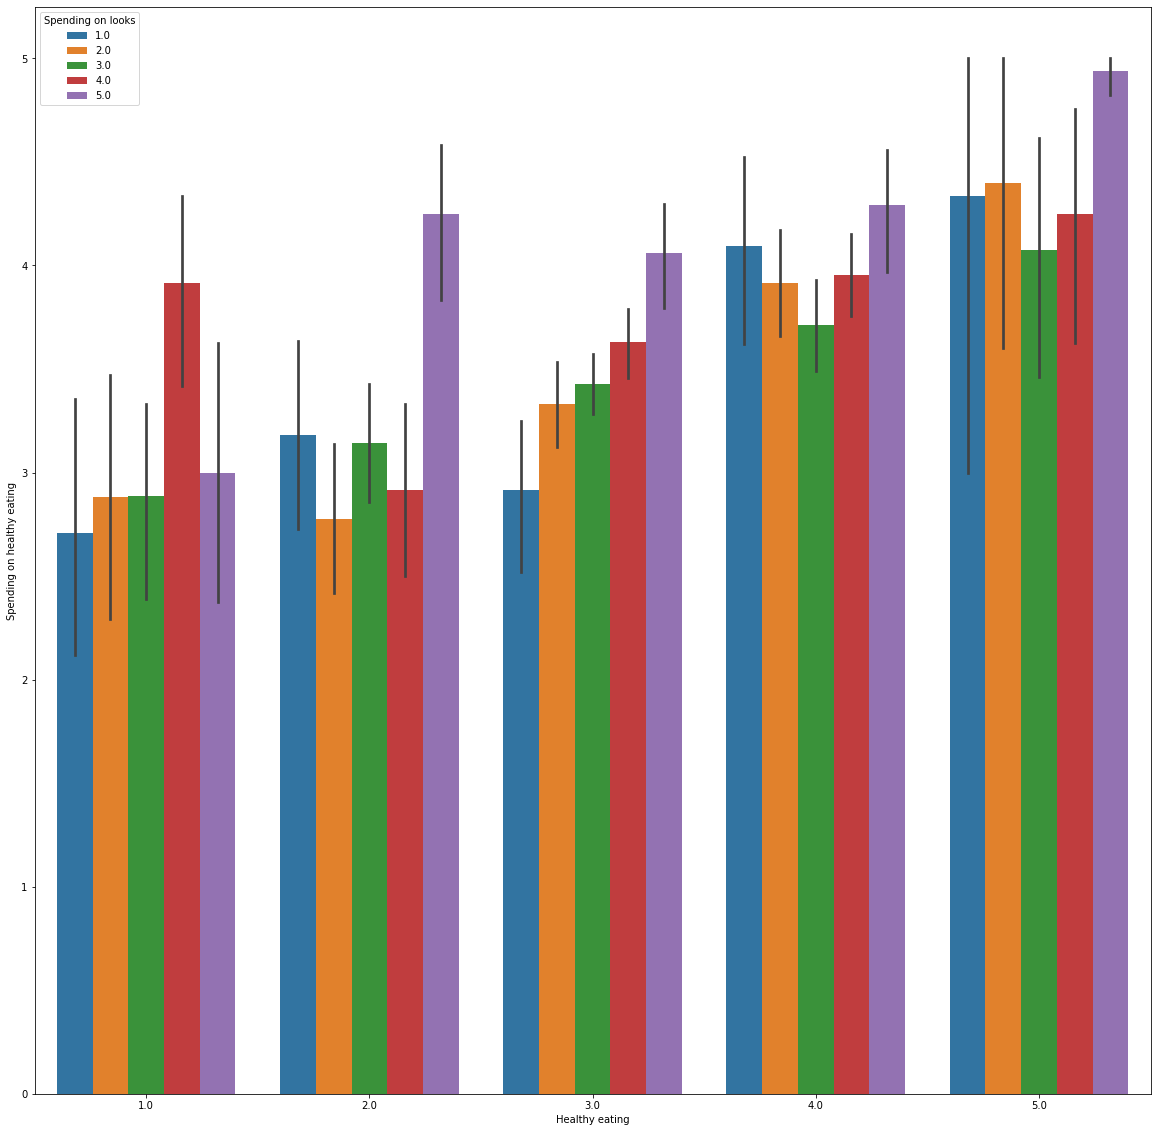

In [139]:
plt.subplots(figsize=(20,20))
sns.barplot(x="Healthy eating", y="Spending on healthy eating", hue="Spending on looks", data=data )

<b> Explaination</b>
<br/>
As we can see here that people who practice healthy eating and spend on looks spend the "most" on healthy eating as compared to all other user types in the plot.

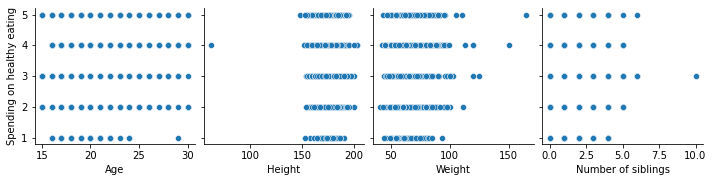

In [140]:
cols = ['Age', 'Height', 'Weight', 'Number of siblings']
for i in range(0, len(cols),5):
    #sns.pairplot(data=new_data,x_vars=new_data.columns[i:i+5], y_vars=['Spending on healthy eating'])
    sns.pairplot(data=new_data,x_vars=cols[i:i+5],y_vars=['Spending on healthy eating'])       

Having calculated the correlation coefficient above now we take scatter plots of columns which give us more insightful results like the ones which have a lower positive coefficient.So here we see Age in the first plot shows uniform(almost) distribution of preferences but height, we see more height more spending on healthy eating,less weight more spending on healthy eating as we see points gathered arround.

<br/>
PS:As you can see I had tkaen for all columns of the dataset to do pairplotting but to show a good insight I have taken these columns as conveyed above and they bring out helpful analysis

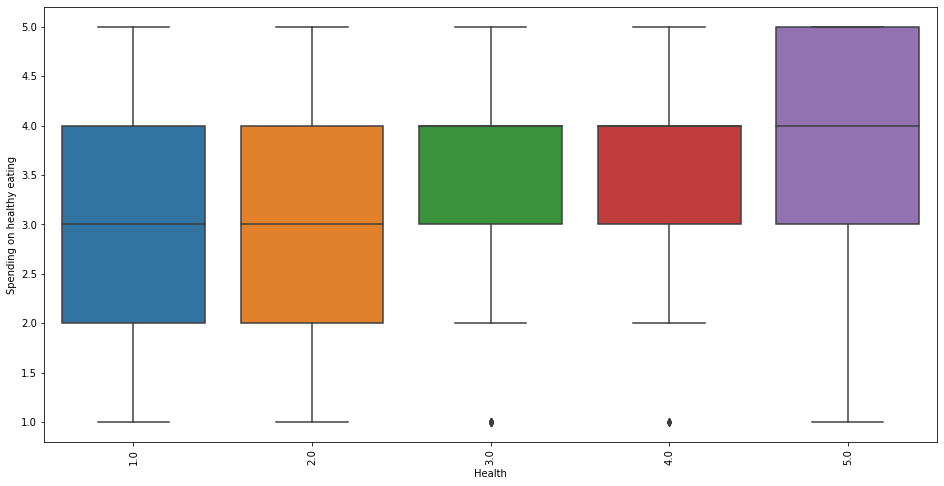

In [141]:
var = 'Health'
box_data2 = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data2)
plt.xticks(rotation=90);

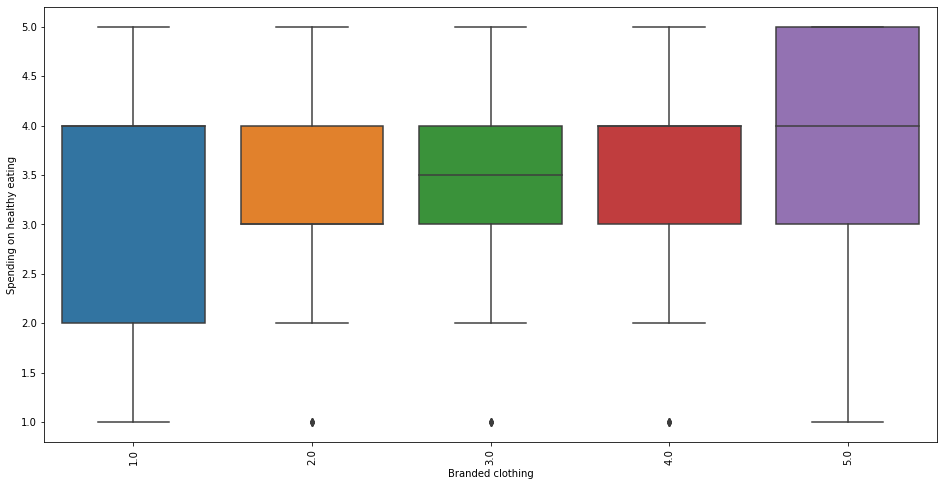

In [142]:
var = 'Branded clothing'
box_data = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data)
plt.xticks(rotation=90);

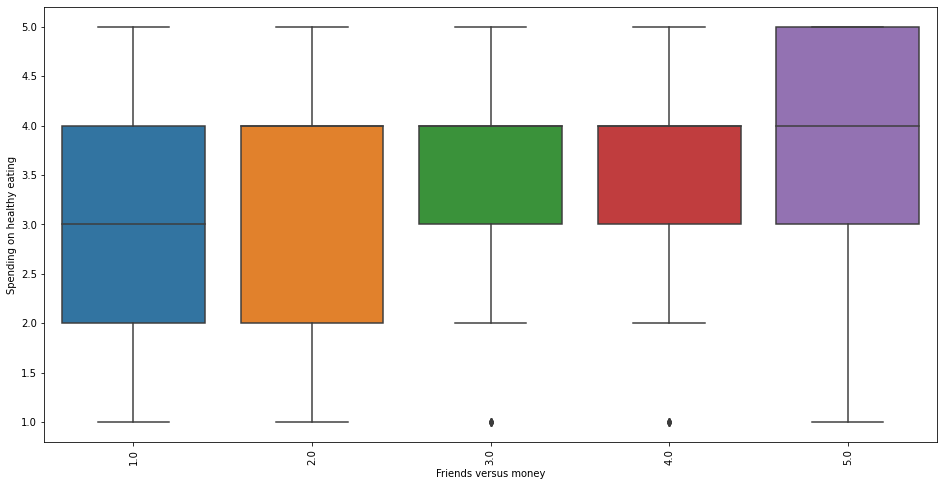

In [143]:
var = 'Friends versus money'
box_data1 = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data1)
plt.xticks(rotation=90);

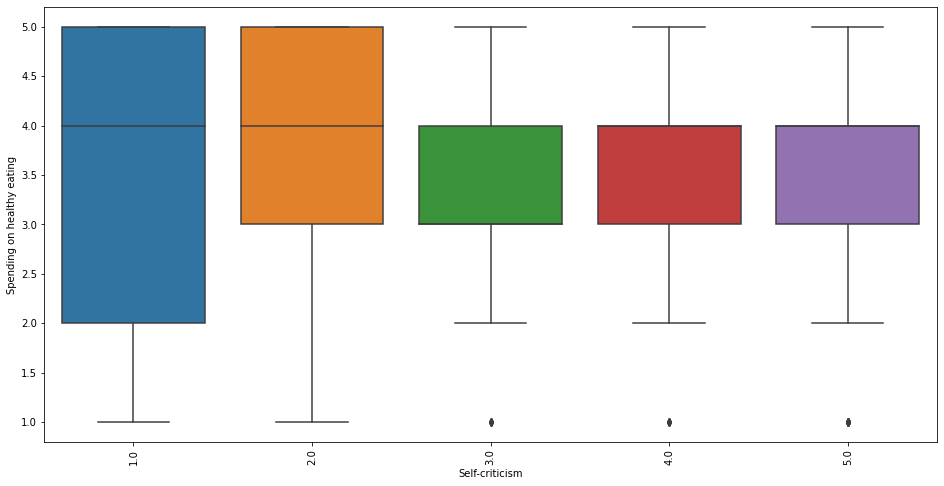

In [144]:
var = 'Self-criticism'
box_data1 = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data1)
plt.xticks(rotation=90);

Here we have picked up some of the positive correlation coefficient variables for analysis.These features are linguistically and as per the information from columns dataset likely to show some variation and useful analysis with target feature.So here we see that for high positive correlation coefficient values(comparitively).We see similar results as in with increase in preference of that variable the feature of interest variable also shows a increase in value.
<br/>
For the case of friends vs money people whoose desire is to have more than friends as we can see in this useful insight they are more likely to spend on Healthy food.
<br/>But if we go for little lower correlation coefficient values like Self-criticism as people who criticize their decision might just improvise and start eating healthy next time.But here we see less self-critic people spend on healthy eating.And the data is well distributed over lower values of self-criticism than for higher values.

##### Predicting probability of Youth spending on Healthy food 

In [145]:
success=len(new_data[(new_data['Healthy eating'] == 5) |  (new_data['Spending on looks'] ==5 ) |
             (new_data['Spending on gadgets'] ==5) | (new_data['Health'] == 5) |
             (new_data['Branded clothing'] == 5 )]
            [new_data['Spending on healthy eating']==5])
total_data = float(len(new_data))
probab_success = success/total_data*100
probab_success

13.465346534653467

Using the most positive correlation coefficient variabl's which we will refer to as strong variables we predict the how much is probability that if people lead a healthy lifestyle or Spend on looks or spend on gadgets or if they prefer branded clothing then the probability estimate of they spending on Healthy eating is only 13.4%.


<br/>
So our aim for the model would be  13.4% or better accuracy of prediction

## Data Prediction(Modeling) 

Importing classifcation library to train our data.

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Splitting data just after cleaning into train/dev/test.So here I have taken 0.4 has training size.Therefore, my test data will be 20% and development data will be 20%.So that we have enough data to train as we have asked to tune the parameters of model on dev data

In [147]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
new_data=clean_dataset(new_data)
new_data_train = new_data.drop(["Spending on healthy eating"], axis=1)
X = new_data_train
y = new_data['Spending on healthy eating']
# we choose random_state as 2015 so that we get same train test split everythime
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=2015)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [148]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)  
X_val_scale = scaler.transform(X_val)
X_test_scale = scaler.transform(X_test) 

Here for this large dataset I have used ExtraTreeClassifier of scikit learn also known as Extremely randomized trees.The benefit of it is improved accuracy and faster computation.At each iteration it picks up the entire sample and chooses decision boundary at random.Instead of cut point variance it uses cut point smoothing for classification.

In [149]:
from sklearn.ensemble import ExtraTreesClassifier

#they are useful for large datset they are faster in computation  than RandomForest and always test random splits 
#so will give better accuracy dut to smoothing.They generalize very well as seen through experiments
model_ExtraTree = ExtraTreesClassifier()
model_ExtraTree.fit(X_val, y_val)
print("Imporatance of Feature:")
print(model_ExtraTree.feature_importances_)

Imporatance of Feature:
[0.00504613 0.00654162 0.00660016 0.00575845 0.00707316 0.00257403
 0.00402981 0.01197482 0.00485277 0.00422764 0.00608486 0.00649861
 0.00716186 0.00652624 0.00569571 0.00499709 0.00432933 0.00626728
 0.00559947 0.00390676 0.0078065  0.00705437 0.00582059 0.0071871
 0.00998067 0.00440072 0.01658235 0.00520795 0.00670833 0.00779234
 0.00640008 0.00475225 0.0047758  0.00750889 0.00437674 0.00612296
 0.00475845 0.00881149 0.00630885 0.00364684 0.00771208 0.00893476
 0.00947792 0.00411006 0.0048096  0.0059977  0.00802351 0.00392023
 0.00388988 0.00589446 0.00652509 0.00646154 0.00500126 0.00680354
 0.00948099 0.0046767  0.00592333 0.01239313 0.00438251 0.0078293
 0.00691564 0.00531022 0.00871934 0.00535283 0.00634054 0.00572722
 0.00563953 0.00716384 0.00498641 0.00581924 0.00708925 0.0107749
 0.0103737  0.00679382 0.00661856 0.00711799 0.00542242 0.01333853
 0.00671886 0.00638741 0.00821307 0.00722488 0.00660441 0.00501316
 0.01073821 0.00580453 0.00736341 0.00652

Now we split this important data again into Training, validation and test data accordingly in orderm to perform classification.

In [150]:
from sklearn.feature_selection import RFE
#Ref:http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
#making to select half of the features after recursive feature extraction 
#here we use the above ExtreTreeClassifier model as it gives us reasonable accuracy due to smoothing(described above)
#we remove half features here to improve further accuracy
rfe = RFE(model_ExtraTree,n_features_to_select=200,step=1)
classifier_rfe = rfe.fit(X_val, y_val)

In [151]:
classifier_rfe.score(X_test,y_test)

0.34814814814814815

####  Feature Selecction

In [152]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Ref:http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#here I chose Chi Square function becuase it selects the highest value of 50 features.Also as we know 
#chi-squared stats are representative of dependence between stochastive variables
#thus it weeds out variables independent of class and thus selects only top 50 as per training 
test = SelectKBest(score_func=chi2, k=50)
fit = test.fit(X_val, y_val)

Here I haved used the ScikitLearn SelectKBest library to extract best features from the dataset.Hence we finally select those columns and use it as important data.As these features will have higher probability to predict the target variable(spending on healthy eating) because these features proved a higher F Score as shown below basis the Y value which is the target variable.Most of the features(columns) are also listed below.

In [153]:
X_new = test.fit_transform(X_val, y_val)
#gettinng index of each feature in fit using get_support
#Ref:http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest.get_support
names = X_train.columns.values[fit.get_support()]
#get integer support of the concenrned features  here using scores_ which gives us F Scores of features with respect to target

#Ref:https://stackoverflow.com/questions/41897020/sklearn-selectkbest-how-to-create-a-dict-of-feature1score-feature2score
scores = fit.scores_[fit.get_support()]
#storing column names and their scores correspondingly so as to visualiza better
names_scores = list(zip(names, scores))
new_df = pd.DataFrame(data = names_scores, columns=['Column_Names', 'F_Scores'])

#sorting the DataFrame to see highest scoring columns at the top and then storing it a new dataFrame
new_df_sorted = new_df.sort_values(['F_Scores', 'Column_Names'], ascending = [False, True])
print(new_df_sorted.head(150))

                      Column_Names   F_Scores
38          Finding lost valuables  14.070571
1                           Weight  11.490913
10                 Art exhibitions  10.419575
19                          Flying  10.127356
11                        Religion   9.795550
13                         Dancing   9.299456
3                       Only child   8.472265
34                   Getting angry   7.985241
42               Spending on looks   7.948880
47                          Latino   7.749708
30                         Charity   7.504704
25                            Fake   7.119855
49                        Romantic   7.051744
37                  Life struggles   6.594680
16                         Theatre   6.436862
9                              Law   6.395995
23                   Writing notes   6.355397
27                    Hypochondria   6.054525
18                            Pets   5.836286
33                        Children   5.774978
6                          Reading

Taking those columns which were taken out as best related to the Target variable

In [154]:
important_data = new_data[names[:20]].copy()

Now we split this important data again into Training, validation and test data accordingly in orderm to perform classification.

In [155]:
X = important_data
y = new_data['Spending on healthy eating']
# we choose random_state as 2015 so that we get same train test split everythime
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X, y,test_size=0.4,random_state=2015)
X_test_imp, X_val_imp, y_test_imp, y_val_imp = train_test_split(X_test, y_test, test_size=0.5)

In [156]:
scaler = StandardScaler()  
scaler.fit(X_train_imp)
X_train_imp_scale = scaler.transform(X_train_imp)  


In [157]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# selecting only Logistic regression to probabilistically compute decision boundaries
#after we have only selected important features
model = LogisticRegression()
fit = model.fit(X_val_imp, y_val_imp)

In [158]:
fit.score(X_test_imp,y_test_imp)

0.31343283582089554

##  Prediction and Data Validation 

In [159]:
y_pred=classifier_rfe.predict(X_test_scale)
y_pred

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

Here as we have selected very few columns based on F Score with target class so prediction is better

In [160]:
y_pred_imp=fit.predict(X_test_imp)
y_pred_imp

array([2., 4., 5., 4., 2., 4., 4., 3., 3., 4., 3., 4., 5., 3., 4., 4., 3.,
       4., 2., 3., 4., 5., 3., 4., 3., 4., 3., 4., 3., 4., 4., 4., 3., 3.,
       4., 5., 5., 3., 4., 2., 5., 3., 2., 3., 4., 5., 2., 3., 3., 4., 4.,
       2., 4., 3., 4., 4., 3., 2., 5., 4., 4., 3., 3., 4., 1., 2., 2.])

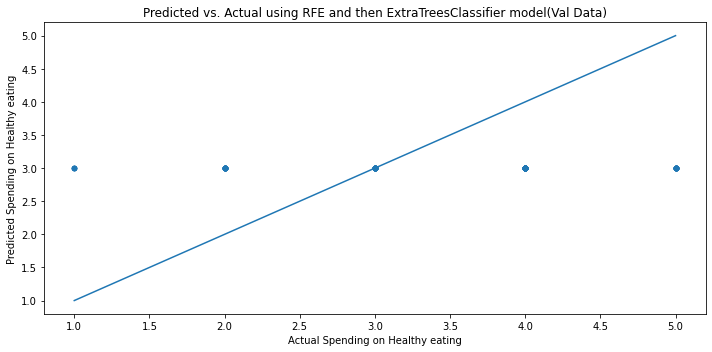

In [161]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test,y_pred,s=20)
plt.title('Predicted vs. Actual using RFE and then ExtraTreesClassifier model(Val Data)')
plt.xlabel('Actual Spending on Healthy eating')
plt.ylabel('Predicted Spending on Healthy eating')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

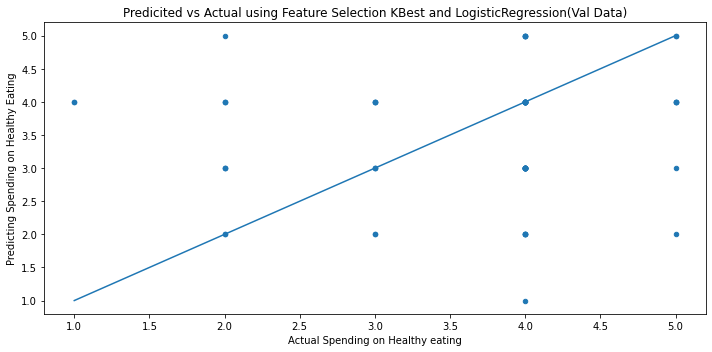

In [162]:
plt.figure(figsize=(10,5))
plt.scatter(y_test_imp,y_pred_imp,s=20)
plt.title('Predicited vs Actual using Feature Selection KBest and LogisticRegression(Val Data)')
plt.xlabel('Actual Spending on Healthy eating')
plt.ylabel('Predicting Spending on Healthy Eating')
plt.plot([min(y_test_imp),max(y_test_imp)],[min(y_test_imp),max(y_test_imp)])
plt.tight_layout()

As mean absolute error gives us the magnitude of error our classification algorithm made while predictions.It refers to the mean of absolute value of error prediction on the entire test dataset.Prediction error is taken for each value so here we have to assume taking the mod.

In [163]:
#Ref:http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model_ExtraTree,X_train_scale,y_train,cv=kFold,scoring='neg_mean_absolute_error')
print("Neg. MAE:")
print((abs(results).mean()))


Neg. MAE:
0.8845731707317075


In [164]:
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model,X_train_imp,y_train_imp,cv=kFold,scoring='neg_mean_absolute_error')
print("Neg. MAE: ") 
print((abs(results).mean()))


Neg. MAE: 
1.0645121951219512



In this model we see that RFE performs better at times.But the chosing best features(Feature selection algorithm) also give reasonable accuracy.We see that we get a good Accuracy and MAE on both.This is only because I chose the right features everytime to predict.For future implementation I would try to fine tune the accuracy so as to be able to predict better.I would make my own class/function rather than use Scikit learn library.


